In [1]:
#basic data science imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# py module
import prepare as p

#Stats imports
from scipy import stats
import math
from scipy.stats import pearsonr, spearmanr, ttest_1samp, ttest_ind, chi2_contingency


# Load CSVs

### Wiki CSV

In [2]:
# Wiki CSV
wiki_df = pd.read_csv('battlebots_wiki.csv', index_col=0)
wiki_df.head(10)

,links,reboot_seasons,team,weapons,weight,other_events,power,names
1,https://battlebots.fandom.com/wiki/Aegis,World Championship V,Team Phalanx,Flipper,250lbs,BattleBots: Bounty Hunters,2x Castle 2028 brushless motors,Aegis
0,https://battlebots.fandom.com/wiki/Ambush,World Championship II,Blindside Robotics,Lifting forks,250lbs,NaN,NaN,Ambush
1,https://battlebots.fandom.com/wiki/Ambush,World Championship II,Blindside Robotics,Circular saws,250lbs,NaN,NaN,Ambush
2,https://battlebots.fandom.com/wiki/Ambush,World Championship II,Blindside Robotics,Flamethrower,250lbs,NaN,NaN,Ambush
5,https://battlebots.fandom.com/wiki/Annihilator,NaN,Team Brute Force,Overhead Spinning Blade,NaN,NaN,NaN,Annihilator
6,https://battlebots.fandom.com/wiki/Anubis,NaN,Team Hunter Robotics,Four Lifting Arms,NaN,NaN,NaN,Anubis
7,https://battlebots.fandom.com/wiki/ATOM94,World Championship V,AutoVoltz Robotics,Vertical spinner,NaN,BattleBots: Bounty Hunters,5450mAh 22.2V 120C LiPo batteries,ATOM94
0,https://battlebots.fandom.com/wiki/Axe_Backwards,World Championship III,Team Axe Backwards (Formerly KurTrox Robotix),Full body drum spinner,250lbs,BattleBots: Bounty Hunters,NaN,Axe_Backwards
1,https://battlebots.fandom.com/wiki/Axe_Backwards,World Championship IV,Team Axe Backwards (Formerly KurTrox Robotix),Full body drum spinner,250lbs,BattleBots: Bounty Hunters,NaN,Axe_Backwards
2,https://battlebots.fandom.com/wiki/Axe_Backwards,World Championship V,Team Axe Backwards (Formerly KurTrox Robotix),Full body drum spinner,250lbs,BattleBots: Bounty Hunters,NaN,Axe_Backwards


In [3]:
wiki_df.shape

(622, 8)

### Links CSV

In [4]:
# Links CSV
links_csv = pd.read_csv('links.csv')
links_csv.head(3)

,https://battlebots.fandom.com/wiki/Template:2015_Competitors
0,https://battlebots.fandom.com/wiki/Template:20...
1,https://battlebots.fandom.com/wiki/Template:20...
2,https://battlebots.fandom.com/wiki/Template:20...


In [5]:
# Reorder Columns
wiki_df = wiki_df[['reboot_seasons','names','weapons','weight','power','team','other_events','links']]
wiki_df.head()

,reboot_seasons,names,weapons,weight,power,team,other_events,links
1,World Championship V,Aegis,Flipper,250lbs,2x Castle 2028 brushless motors,Team Phalanx,BattleBots: Bounty Hunters,https://battlebots.fandom.com/wiki/Aegis
0,World Championship II,Ambush,Lifting forks,250lbs,NaN,Blindside Robotics,NaN,https://battlebots.fandom.com/wiki/Ambush
1,World Championship II,Ambush,Circular saws,250lbs,NaN,Blindside Robotics,NaN,https://battlebots.fandom.com/wiki/Ambush
2,World Championship II,Ambush,Flamethrower,250lbs,NaN,Blindside Robotics,NaN,https://battlebots.fandom.com/wiki/Ambush
5,NaN,Annihilator,Overhead Spinning Blade,NaN,NaN,Team Brute Force,NaN,https://battlebots.fandom.com/wiki/Annihilator


### Stats Table CSV

In [6]:
# Load Stats History CSV
all_stats = pd.read_csv('all_stats_history.csv', index_col=0)
all_stats.head()

,robot_name,total_matches,win_percentage,total_wins,losses,ko,ko_percentage,avg_ko_time,ko_against,ko_against_percentage,decision_wins,season
0,axe_backwards,11.0,9%,1.0,10.0,1.0,9%,135 s,8.0,73%,0.0,2019
1,battlesaw,2.0,0%,0.0,2.0,0.0,0%,NaN,2.0,100%,0.0,2019
2,bite_force,24.0,96%,23.0,1.0,16.0,67%,100 s,0.0,0%,7.0,2019
3,black_dragon,24.0,67%,16.0,8.0,10.0,42%,90 s,0.0,0%,8.0,2019
4,blacksmith,20.0,40%,8.0,12.0,3.0,15%,166 s,2.0,10%,4.0,2019


In [7]:
# Copy of original
all_stats_copy = all_stats.copy()

In [8]:
all_stats.shape

(249, 12)

In [9]:
list(all_stats.columns)


['robot_name',
 'total_matches',
 'win_percentage',
 'total_wins',
 'losses',
 'ko',
 'ko_percentage',
 'avg_ko_time',
 'ko_against',
 'ko_against_percentage',
 'decision_wins',
 'season']

### Match Table CSV

In [10]:
# Load match table csv
match = pd.read_csv('match.csv', index_col=0)
match.head()

,Season,Round,Matchup,Results,robot,Opponent
0,WCVII,Episode 702,Switchback vs Banshee,Switchback by JD,banshee-wcvii,NaN
1,WCVII,Episode 706,Banshee vs Valkyrie,Banshee by JD,banshee-wcvii,NaN
2,WCVII,Episode 710,Emulsifier vs Banshee,Emulsifier by KO 1m50s,banshee-wcvii,NaN
3,WCVII,Episode 715,Blip vs Banshee,NaN,banshee-wcvii,NaN
4,WCVII,Episode 704,Kraken vs Beta,Beta by JD,beta-wcvii,NaN


In [11]:
# Move robot to beginning of df
match = match.set_index('robot')
match = match.reset_index()
match.head()

,robot,Season,Round,Matchup,Results,Opponent
0,banshee-wcvii,WCVII,Episode 702,Switchback vs Banshee,Switchback by JD,NaN
1,banshee-wcvii,WCVII,Episode 706,Banshee vs Valkyrie,Banshee by JD,NaN
2,banshee-wcvii,WCVII,Episode 710,Emulsifier vs Banshee,Emulsifier by KO 1m50s,NaN
3,banshee-wcvii,WCVII,Episode 715,Blip vs Banshee,NaN,NaN
4,beta-wcvii,WCVII,Episode 704,Kraken vs Beta,Beta by JD,NaN


###  Match Model CSV

In [12]:
match_model = pd.read_csv('match_model.csv', index_col=0)
match_model.head()

,main,opp,winner,win_type,time,Season,Round
0,Switchback,Banshee,Switchback,JD,0,WCVII,Episode 702
1,Banshee,Valkyrie,Banshee,JD,0,WCVII,Episode 706
2,Emulsifier,Banshee,Emulsifier,KO,110,WCVII,Episode 710
4,Kraken,Beta,Beta,JD,0,WCVII,Episode 704
5,Beta,Shatter,Beta,JD,0,WCVII,Episode 708


# Prep/Clean Data

In [13]:
# List to reorder columns
col_names = ['robot_name', 'season',
 'total_matches',
 'win_percentage',
 'total_wins',
 'losses',
 'ko',
 'ko_percentage',
 'avg_ko_time',
 'ko_against',
 'ko_against_percentage',
 'decision_wins'
 ]

In [14]:
# Reorder columns
all_stats = all_stats[['robot_name', 'season',
 'total_matches',
 'win_percentage',
 'total_wins',
 'losses',
 'ko',
 'ko_percentage',
 'avg_ko_time',
 'ko_against',
 'ko_against_percentage',
 'decision_wins']]
all_stats.head()

,robot_name,season,total_matches,win_percentage,total_wins,losses,ko,ko_percentage,avg_ko_time,ko_against,ko_against_percentage,decision_wins
0,axe_backwards,2019,11.0,9%,1.0,10.0,1.0,9%,135 s,8.0,73%,0.0
1,battlesaw,2019,2.0,0%,0.0,2.0,0.0,0%,NaN,2.0,100%,0.0
2,bite_force,2019,24.0,96%,23.0,1.0,16.0,67%,100 s,0.0,0%,7.0
3,black_dragon,2019,24.0,67%,16.0,8.0,10.0,42%,90 s,0.0,0%,8.0
4,blacksmith,2019,20.0,40%,8.0,12.0,3.0,15%,166 s,2.0,10%,4.0


In [15]:
# Check for same bot for multiple seasons
all_stats.robot_name.value_counts()

valkyrie             4
end_game             4
sawblaze             4
rotator              4
ribbot               4
                    ..
the_four_horsemen    1
falcon               1
shellshock           1
slammow              1
triton               1
Name: robot_name, Length: 125, dtype: int64

In [16]:
# Check for Nulls
all_stats.isna().sum()

robot_name                1
season                    0
total_matches             0
win_percentage            2
total_wins                0
losses                    0
ko                        0
ko_percentage             2
avg_ko_time              39
ko_against                0
ko_against_percentage     2
decision_wins             0
dtype: int64

In [17]:
# Normalize percentage columns and change dtype 
all_stats.win_percentage = all_stats.win_percentage.str.replace('%','').astype(float)
all_stats.ko_percentage = all_stats.ko_percentage.str.replace('%','').astype(float)
all_stats.ko_against_percentage = all_stats.ko_against_percentage.str.replace('%','').astype(float)
all_stats.head()

,robot_name,season,total_matches,win_percentage,total_wins,losses,ko,ko_percentage,avg_ko_time,ko_against,ko_against_percentage,decision_wins
0,axe_backwards,2019,11.0,9.0,1.0,10.0,1.0,9.0,135 s,8.0,73.0,0.0
1,battlesaw,2019,2.0,0.0,0.0,2.0,0.0,0.0,NaN,2.0,100.0,0.0
2,bite_force,2019,24.0,96.0,23.0,1.0,16.0,67.0,100 s,0.0,0.0,7.0
3,black_dragon,2019,24.0,67.0,16.0,8.0,10.0,42.0,90 s,0.0,0.0,8.0
4,blacksmith,2019,20.0,40.0,8.0,12.0,3.0,15.0,166 s,2.0,10.0,4.0


In [18]:
# Function to turn percentage columns into decimals

def convert_percent_cols(df):
    
    # Remove '%' and convert to Float
    df.win_percentage = df.win_percentage.str.replace('%','').astype(float)
    df.ko_percentage = df.ko_percentage.str.replace('%','').astype(float)
    df.ko_against_percentage = df.ko_against_percentage.str.replace('%','').astype(float)
    
    # Lists to hold numbers
    win_percentage_list = []
    ko_percentage_list = []
    ko_against_percentage_list = []
    
    # Loop for win percentage
    for number in df.win_percentage:
        
        # Multiply to turn into decimal
        new = number * 0.01
        
        # Append lis
        win_percentage_list.append(new)
    
    # Loop for KO percentage
    for number in df.ko_percentage:
        
        # Multiply to turn into decimal
        new = number * 0.01
        
        # Append lis
        ko_percentage_list.append(new)
    
    # Loop for KO against percentage
    for number in df.ko_against_percentage:
        
        # Multiply to turn into decimal
        new = number * 0.01
        
        # Append lis
        ko_against_percentage_list.append(new)
        
    df['win_percentage'] = win_percentage_list
    df['ko_percentage'] = ko_percentage_list
    df['ko_against_percentage'] = ko_against_percentage_list
    
    return df


In [19]:
# Test function on copy df
test = convert_percent_cols(all_stats_copy)
test.head()

,robot_name,total_matches,win_percentage,total_wins,losses,ko,ko_percentage,avg_ko_time,ko_against,ko_against_percentage,decision_wins,season
0,axe_backwards,11.0,0.09,1.0,10.0,1.0,0.09,135 s,8.0,0.73,0.0,2019
1,battlesaw,2.0,0.00,0.0,2.0,0.0,0.00,NaN,2.0,1.00,0.0,2019
2,bite_force,24.0,0.96,23.0,1.0,16.0,0.67,100 s,0.0,0.00,7.0,2019
3,black_dragon,24.0,0.67,16.0,8.0,10.0,0.42,90 s,0.0,0.00,8.0,2019
4,blacksmith,20.0,0.40,8.0,12.0,3.0,0.15,166 s,2.0,0.10,4.0,2019


In [20]:
# Function to remove 's' and covert to INT

def convert_sec_col(df):
    

    # Remove 's' 
    df.avg_ko_time = df.avg_ko_time.str.replace('s','')
    
    # Replace NaN with '0'
    df.avg_ko_time = df.avg_ko_time.fillna(0)
    
    df.avg_ko_time = df.avg_ko_time.astype(float)
    
    return df

In [21]:
test = convert_sec_col(test)
test.head()

,robot_name,total_matches,win_percentage,total_wins,losses,ko,ko_percentage,avg_ko_time,ko_against,ko_against_percentage,decision_wins,season
0,axe_backwards,11.0,0.09,1.0,10.0,1.0,0.09,135.0,8.0,0.73,0.0,2019
1,battlesaw,2.0,0.00,0.0,2.0,0.0,0.00,0.0,2.0,1.00,0.0,2019
2,bite_force,24.0,0.96,23.0,1.0,16.0,0.67,100.0,0.0,0.00,7.0,2019
3,black_dragon,24.0,0.67,16.0,8.0,10.0,0.42,90.0,0.0,0.00,8.0,2019
4,blacksmith,20.0,0.40,8.0,12.0,3.0,0.15,166.0,2.0,0.10,4.0,2019


In [22]:
# Use cleaning function on working df
all_stats = convert_sec_col(all_stats)
all_stats.head()

,robot_name,season,total_matches,win_percentage,total_wins,losses,ko,ko_percentage,avg_ko_time,ko_against,ko_against_percentage,decision_wins
0,axe_backwards,2019,11.0,9.0,1.0,10.0,1.0,9.0,135.0,8.0,73.0,0.0
1,battlesaw,2019,2.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,100.0,0.0
2,bite_force,2019,24.0,96.0,23.0,1.0,16.0,67.0,100.0,0.0,0.0,7.0
3,black_dragon,2019,24.0,67.0,16.0,8.0,10.0,42.0,90.0,0.0,0.0,8.0
4,blacksmith,2019,20.0,40.0,8.0,12.0,3.0,15.0,166.0,2.0,10.0,4.0


# Explore

## Stats Table Exploration

**Initial Questions**

1. Which robots have the most KOs?
2. Which robots have the most decision wins?
2. Which robots have the most wins?
3. Which robots are quickets at knocking out their opponent?

### Which robots have the most KOs?

In [23]:
all_stats.sort_values('ko', ascending=False).head(50)

,robot_name,season,total_matches,win_percentage,total_wins,losses,ko,ko_percentage,avg_ko_time,ko_against,ko_against_percentage,decision_wins
55,tombstone,2020,35.0,71.0,25.0,10.0,20.0,57.0,84.0,8.0,23.0,5.0
55,tombstone,2021,35.0,71.0,25.0,10.0,20.0,57.0,84.0,8.0,23.0,5.0
60,tombstone,2019,35.0,71.0,25.0,10.0,20.0,57.0,84.0,8.0,23.0,5.0
60,witch_doctor,2021,39.0,69.0,27.0,12.0,19.0,49.0,87.0,10.0,26.0,8.0
61,witch_doctor,2020,39.0,69.0,27.0,12.0,19.0,49.0,87.0,10.0,26.0,8.0
56,witch_doctor,wcvii,39.0,69.0,27.0,12.0,19.0,49.0,87.0,10.0,26.0,8.0
66,NaN,5345,39.0,69.0,27.0,12.0,19.0,49.0,87.0,10.0,26.0,8.0
16,end_game,2021,30.0,67.0,20.0,10.0,17.0,57.0,110.0,8.0,27.0,2.0
17,end_game,2020,30.0,67.0,20.0,10.0,17.0,57.0,110.0,8.0,27.0,2.0
29,hypershock,2020,34.0,56.0,19.0,15.0,17.0,50.0,83.0,10.0,29.0,2.0


In [24]:
top_50_ko = all_stats.sort_values('ko', ascending=False).head(50)

<AxesSubplot:xlabel='ko', ylabel='robot_name'>

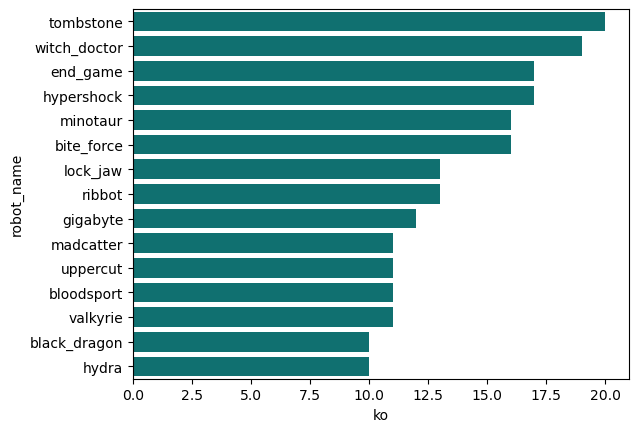

In [25]:
sns.barplot(data=top_50_ko, x='ko', y='robot_name', color='teal')

<div class="alert alert-block alert-success"> 
<b>Takeaways:</b><br>
<b> Out of all the seasons, for the top 50 results with most KOs, these are the robots that had most KOs.<b>
    
</div>



### Which robot has the most decision wins?

In [26]:
top_50_decisions = all_stats.sort_values('decision_wins', ascending=False).head(50)
top_50_decisions.head()

,robot_name,season,total_matches,win_percentage,total_wins,losses,ko,ko_percentage,avg_ko_time,ko_against,ko_against_percentage,decision_wins
59,whiplash,2021,32.0,69.0,22.0,10.0,9.0,28.0,102.0,8.0,25.0,17.0
65,whiplash,2019,32.0,69.0,22.0,10.0,9.0,28.0,102.0,8.0,25.0,17.0
55,whiplash,wcvii,32.0,69.0,22.0,10.0,9.0,28.0,102.0,8.0,25.0,17.0
60,whiplash,2020,32.0,69.0,22.0,10.0,9.0,28.0,102.0,8.0,25.0,17.0
47,sawblaze,2021,30.0,67.0,20.0,10.0,8.0,27.0,128.0,5.0,17.0,12.0


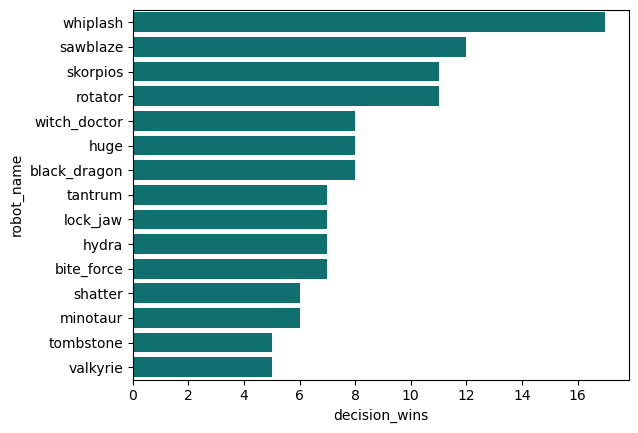

In [27]:
sns.barplot(data=top_50_decisions, x='decision_wins', y='robot_name', color='teal')
plt.show()

<div class="alert alert-block alert-success"> 
<b>Takeaways:</b><br>
<b> Out of all the seasons, for the top 50 results with most decisions, whiplash has the most decision wins by a large margin. Sawblaze has the second most with Skorpios following closely behind..<b>
    
</div>

### Which Robot has the most wins?

In [28]:
top_wins = all_stats.sort_values('total_wins', ascending=False).head(50)
top_wins.head()

,robot_name,season,total_matches,win_percentage,total_wins,losses,ko,ko_percentage,avg_ko_time,ko_against,ko_against_percentage,decision_wins
56,witch_doctor,wcvii,39.0,69.0,27.0,12.0,19.0,49.0,87.0,10.0,26.0,8.0
61,witch_doctor,2020,39.0,69.0,27.0,12.0,19.0,49.0,87.0,10.0,26.0,8.0
60,witch_doctor,2021,39.0,69.0,27.0,12.0,19.0,49.0,87.0,10.0,26.0,8.0
66,NaN,5345,39.0,69.0,27.0,12.0,19.0,49.0,87.0,10.0,26.0,8.0
60,tombstone,2019,35.0,71.0,25.0,10.0,20.0,57.0,84.0,8.0,23.0,5.0


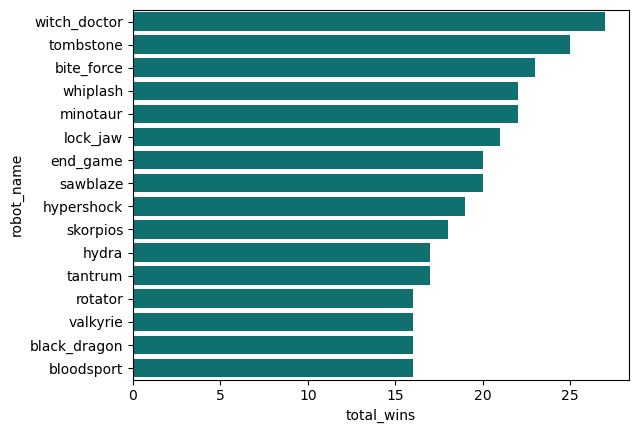

In [29]:
sns.barplot(data=top_wins, x='total_wins', y='robot_name', color='teal')
plt.show()

<div class="alert alert-block alert-success"> 
<b>Takeaways:</b><br>
<b> Out of all the seasons, for the top 50 results with wins, Witch Doctor has the most wins, followed by Tombstone and Bite Force.<b>
    
</div>

### Which robots are quickest at knocking out their opponent?

In [30]:
ko_artists = all_stats.sort_values('avg_ko_time', ascending=False).head(50).head()
ko_artists.head()

,robot_name,season,total_matches,win_percentage,total_wins,losses,ko,ko_percentage,avg_ko_time,ko_against,ko_against_percentage,decision_wins
2,blacksmith,2021,20.0,40.0,8.0,12.0,3.0,15.0,166.0,2.0,10.0,4.0
4,blacksmith,2019,20.0,40.0,8.0,12.0,3.0,15.0,166.0,2.0,10.0,4.0
49,slap_box,2020,3.0,33.0,1.0,2.0,1.0,33.0,165.0,1.0,33.0,0.0
5,beta,2020,12.0,67.0,8.0,4.0,3.0,25.0,156.0,3.0,25.0,5.0
1,beta,wcvii,12.0,67.0,8.0,4.0,3.0,25.0,156.0,3.0,25.0,5.0


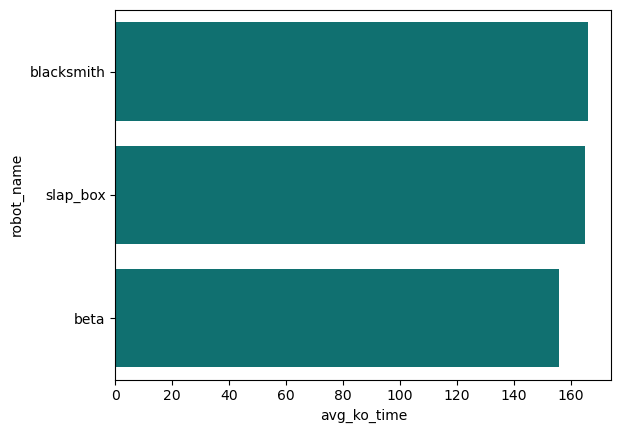

In [31]:
sns.barplot(data=ko_artists, x='avg_ko_time', y='robot_name', color='teal')
plt.show()

<div class="alert alert-block alert-success"> 
<b>Takeaways:</b><br>
<b> Out of all the seasons, for the top 50 results for the fastest knockout times, three robots seem to have the quickest knockouts. Blacksmith, Slap box, and Beta.<b>
    
</div>

## Match Table Exploration

In [32]:
# Quick gander at the df
match_model.head(3)

,main,opp,winner,win_type,time,Season,Round
0,Switchback,Banshee,Switchback,JD,0,WCVII,Episode 702
1,Banshee,Valkyrie,Banshee,JD,0,WCVII,Episode 706
2,Emulsifier,Banshee,Emulsifier,KO,110,WCVII,Episode 710


In [33]:
# Split data for exploration. This df will be used for modeling.
train, val, test = p.split_data(match_model, target='winner')
train.shape, val.shape, test.shape

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [34]:
wiki_df.head(2)

,reboot_seasons,names,weapons,weight,power,team,other_events,links
1,World Championship V,Aegis,Flipper,250lbs,2x Castle 2028 brushless motors,Team Phalanx,BattleBots: Bounty Hunters,https://battlebots.fandom.com/wiki/Aegis
0,World Championship II,Ambush,Lifting forks,250lbs,NaN,Blindside Robotics,NaN,https://battlebots.fandom.com/wiki/Ambush


In [35]:
match_model.head(2)

,main,opp,winner,win_type,time,Season,Round
0,Switchback,Banshee,Switchback,JD,0,WCVII,Episode 702
1,Banshee,Valkyrie,Banshee,JD,0,WCVII,Episode 706


In [36]:
match.head(2)

,robot,Season,Round,Matchup,Results,Opponent
0,banshee-wcvii,WCVII,Episode 702,Switchback vs Banshee,Switchback by JD,NaN
1,banshee-wcvii,WCVII,Episode 706,Banshee vs Valkyrie,Banshee by JD,NaN


In [37]:
all_stats.head(2)

,robot_name,season,total_matches,win_percentage,total_wins,losses,ko,ko_percentage,avg_ko_time,ko_against,ko_against_percentage,decision_wins
0,axe_backwards,2019,11.0,9.0,1.0,10.0,1.0,9.0,135.0,8.0,73.0,0.0
1,battlesaw,2019,2.0,0.0,0.0,2.0,0.0,0.0,0.0,2.0,100.0,0.0


In [38]:
# Lowercase all names
wiki_df.names = wiki_df.names.str.lower()
match_model.main = match_model.main.str.lower()
match_model.opp = match_model.opp.str.lower()
match_model.winner = match_model.winner.str.lower()


In [39]:
merge = pd.merge(wiki_df, match_model, left_on='names', right_on='main', how='inner')